# Analizing the results-Arno-Jeremy

Nous avons étudié plusieurs paramètres pour déterminer lesquels sont les plus adéquats afin d'avoir l'associativité de la somme et la commutativité de la multiplication les plus précises possibles. Nous avons effectué notre étude en Python en faisant varier deux opérations, le nombre de répétitions effectués, la bibiliothèque utilisée pour générer des flottants aléatoirement (Numpy ou Random), la précision demandée, l'utilisation de nombres décimaux. Toutes ces expériences ont ensuite été classées dans le tableau suivant avec le pourcentage d'égalité sur chacune d'entre elles. Le code Python suivant a été utilisé pou cette étude.

In [13]:
# Exploring combination of variability factors with runtime parameters (without CLI)

import random
import numpy as np
from decimal import Decimal, getcontext
import csv

def check_property(operation1, operation2, randomGenerator, repetitions, precision, decimal_use = True):
    if decimal_use:
        getcontext().prec = precision

    correct_count = repetitions
    for _ in range(repetitions):
        x = eval(randomGenerator)
        y = eval(randomGenerator)
        z = eval(randomGenerator)
        if decimal_use:
            x = Decimal(x)
            y = Decimal(y)
            z = Decimal(z)

        # Dynamically evaluate the operations
        result1 = eval(operation1)
        result2 = eval(operation2)

        if result1 != result2:
            correct_count -= 1

    print(f"Percentage of correct trials : {round(correct_count/repetitions*100, 3)}, number of repetitions :  {repetitions} trials")
    return round(correct_count/repetitions*100, 3)

# Define possible combinations of operations and repetition counts
operations = [
    {"operation1": "(x + y) + z", "operation2": "x + (y + z)"},  # Associativity
    {"operation1": "(x * y) * z", "operation2": "x * (y * z)"},  # Associativity (multiplication)
]

# Define different repetition counts
repetitions_list = [1000, 2000, 5000]

# Defining different precision levels for addition
# Over 55 the accuracy for addition is 100 %
addition_precision_list = [50, 53, 60]

# Defining different precision levels for multiplication
# Over 110 the accuracy for addition is 100 %
multiplication_precision_list = [105, 110]

# Seed the random number generator
randomGenerator = ["np.random.rand()", "random.random()"]

csv_filename = "/app/output/results.csv"

with open(csv_filename, "w") as csvfile:
    # Defining the fieldnames for the CSV file
    fieldnames = ['operation1', 'operation2', 'repetitions', 'random_generator', 'precision', 'decimal_use', 'percentage_correct']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Writing the header of the CSV file
    writer.writeheader()

    # Looping through all combinations of repetitions and generator for addition
    operation_1 = operations[0]['operation1']
    operation_2 = operations[0]['operation2']
    for reps in repetitions_list:
        for randGen in randomGenerator:
            for prec in addition_precision_list:
                print(f"\nChecking addition, repetitions : {reps} , float generating method : {randGen}, precision : {prec}")
                percentage = check_property(operation_1, operation_2, randGen, reps, prec)
                writer.writerow({
                    'operation1': operation_1,
                    'operation2': operation_2,
                    'repetitions': reps,
                    'random_generator': randGen,
                    'precision': prec,
                    'decimal_use': True,
                    'percentage_correct': percentage
                })

    # Looping through all combinations of repetitions and generator for multiplication
    operation_1 = operations[1]['operation1']
    operation_2 = operations[1]['operation2']
    for reps in repetitions_list:
        for randGen in randomGenerator:
            for prec in multiplication_precision_list:
                print(f"\nChecking multiplication, repetitions : {reps} , float generating method : {randGen}, precision : {prec}")
                percentage = check_property(operation_1, operation_2, randGen, reps, prec)
                writer.writerow({
                    'operation1': operation_1,
                    'operation2': operation_2,
                    'repetitions': reps,
                    'random_generator': randGen,
                       'precision': prec,
                    'decimal_use': True,
                    'percentage_correct': percentage
                })

    # Checking both operations without adding precision
    for op in operations:
        operation_1 = op['operation1']
        operation_2 = op['operation2']
        for reps in repetitions_list:
            for randGen in randomGenerator:
                print(f"\nChecking {operation_1}, repetitions : {reps} , float generating method : {randGen}, precision : False")
                percentage = check_property(operation_1, operation_2, randGen, reps, 50, False)
                writer.writerow({
                    'operation1': operation_1,
                    'operation2': operation_2,
                    'repetitions': reps,
                    'random_generator': randGen,
                    'precision': 0,
                    'decimal_use': False,
                    'percentage_correct': percentage
                })

# Ce code ne fonctionne pas dans ce JupyterNotebook. Cependant, il est fonctionnel en local ou sur Github avec les actions.

FileNotFoundError: [Errno 2] No such file or directory: '/app/output/results.csv'

## Tableau des résultats

|      Operation1    |     Operation2    | Repetitions | Random Generator | Precision | Decimal Use | Percentage Correct |
|:------------------:|:-----------------:|:-----------:|:----------------:|:---------:|:-----------:|:-------------------:|
|    (x + y) + z     |    x + (y + z)    |    1000     |      Numpy       |    50     |     True    |        74.0        |
|    (x + y) + z     |    x + (y + z)    |    1000     |      Numpy       |    53     |     True    |        80.0        |
|    (x + y) + z     |    x + (y + z)    |    1000     |      Numpy       |    60     |     True    |       100.0        |
|    (x + y) + z     |    x + (y + z)    |    1000     |     Random       |    50     |     True    |        75.0        |
|    (x + y) + z     |    x + (y + z)    |    1000     |     Random       |    53     |     True    |        78.1        |
|    (x + y) + z     |    x + (y + z)    |    1000     |     Random       |    60     |     True    |       100.0        |
|    (x + y) + z     |    x + (y + z)    |    2000     |      Numpy       |    50     |     True    |       73.25        |
|    (x + y) + z     |    x + (y + z)    |    2000     |      Numpy       |    53     |     True    |        78.8        |
|    (x + y) + z     |    x + (y + z)    |    2000     |      Numpy       |    60     |     True    |       100.0        |
|    (x + y) + z     |    x + (y + z)    |    2000     |     Random       |    50     |     True    |       73.65        |
|    (x + y) + z     |    x + (y + z)    |    2000     |     Random       |    53     |     True    |       79.75        |
|    (x + y) + z     |    x + (y + z)    |    2000     |     Random       |    60     |     True    |       100.0        |
|    (x + y) + z     |    x + (y + z)    |    5000     |      Numpy       |    50     |     True    |       73.26        |
|    (x + y) + z     |    x + (y + z)    |    5000     |      Numpy       |    53     |     True    |       79.54        |
|    (x + y) + z     |    x + (y + z)    |    5000     |      Numpy       |    60     |     True    |       100.0        |
|    (x + y) + z     |    x + (y + z)    |    5000     |     Random       |    50     |     True    |       74.76        |
|    (x + y) + z     |    x + (y + z)    |    5000     |     Random       |    53     |     True    |       80.86        |
|    (x + y) + z     |    x + (y + z)    |    5000     |     Random       |    60     |     True    |       100.0        |
|    (x * y) * z     |    x * (y * z)    |    1000     |      Numpy       |   105     |     True    |        86.3        |
|    (x * y) * z     |    x * (y * z)    |    1000     |      Numpy       |   110     |     True    |       100.0        |
|    (x * y) * z     |    x * (y * z)    |    1000     |     Random       |   105     |     True    |        85.0        |
|    (x * y) * z     |    x * (y * z)    |    1000     |     Random       |   110     |     True    |       100.0        |
|    (x * y) * z     |    x * (y * z)    |    2000     |      Numpy       |   105     |     True    |        85.7        |
|    (x * y) * z     |    x * (y * z)    |    2000     |      Numpy       |   110     |     True    |       100.0        |
|    (x * y) * z     |    x * (y * z)    |    2000     |     Random       |   105     |     True    |       85.45        |
|    (x * y) * z     |    x * (y * z)    |    2000     |     Random       |   110     |     True    |       100.0        |
|    (x * y) * z     |    x * (y * z)    |    5000     |      Numpy       |   105     |     True    |        85.8        |
|    (x * y) * z     |    x * (y * z)    |    5000     |      Numpy       |   110     |     True    |       100.0        |
|    (x * y) * z     |    x * (y * z)    |    5000     |     Random       |   105     |     True    |       85.28        |
|    (x * y) * z     |    x * (y * z)    |    5000     |     Random       |   110     |     True    |       100.0        |
|    (x + y) + z     |    x + (y + z)    |    1000     |      Numpy       |    0      |    False    |        81.0        |
|    (x + y) + z     |    x + (y + z)    |    1000     |     Random       |    0      |    False    |        84.0        |
|    (x + y) + z     |    x + (y + z)    |    2000     |      Numpy       |    0      |    False    |        83.2        |
|    (x + y) + z     |    x + (y + z)    |    2000     |     Random       |    0      |    False    |        82.3        |
|    (x + y) + z     |    x + (y + z)    |    5000     |      Numpy       |    0      |    False    |       83.12        |
|    (x + y) + z     |    x + (y + z)    |    5000     |     Random       |    0      |    False    |       82.74        |
|    (x * y) * z     |    x * (y * z)    |    1000     |      Numpy       |    0      |    False    |        66.7        |
|    (x * y) * z     |    x * (y * z)    |    1000     |     Random       |    0      |    False    |        66.4        |
|    (x * y) * z     |    x * (y * z)    |    2000     |      Numpy       |    0      |    False    |       65.45        |
|    (x * y) * z     |    x * (y * z)    |    2000     |     Random       |    0      |    False    |       66.95        |
|    (x * y) * z     |    x * (y * z)    |    5000     |      Numpy       |    0      |    False    |        65.5        |
|    (x * y) * z     |    x * (y * z)    |    5000     |     Random       |    0      |    False    |        65.12       |    


## Analyse des résultats

Avec ce tableau, on peut réaliser un arbre de décision. Nous définissons trois classes pour l'arbre de décision : Classe A (100% de bonnes réponses), Classe B (75 à 99.9 % de bonnes réponses) et Classe C (moins de 75%). En normalisant les données, puis en choisissant l'arbre le plus optimal conformément à nos données, on obtient en faisant les calculs à la main : 

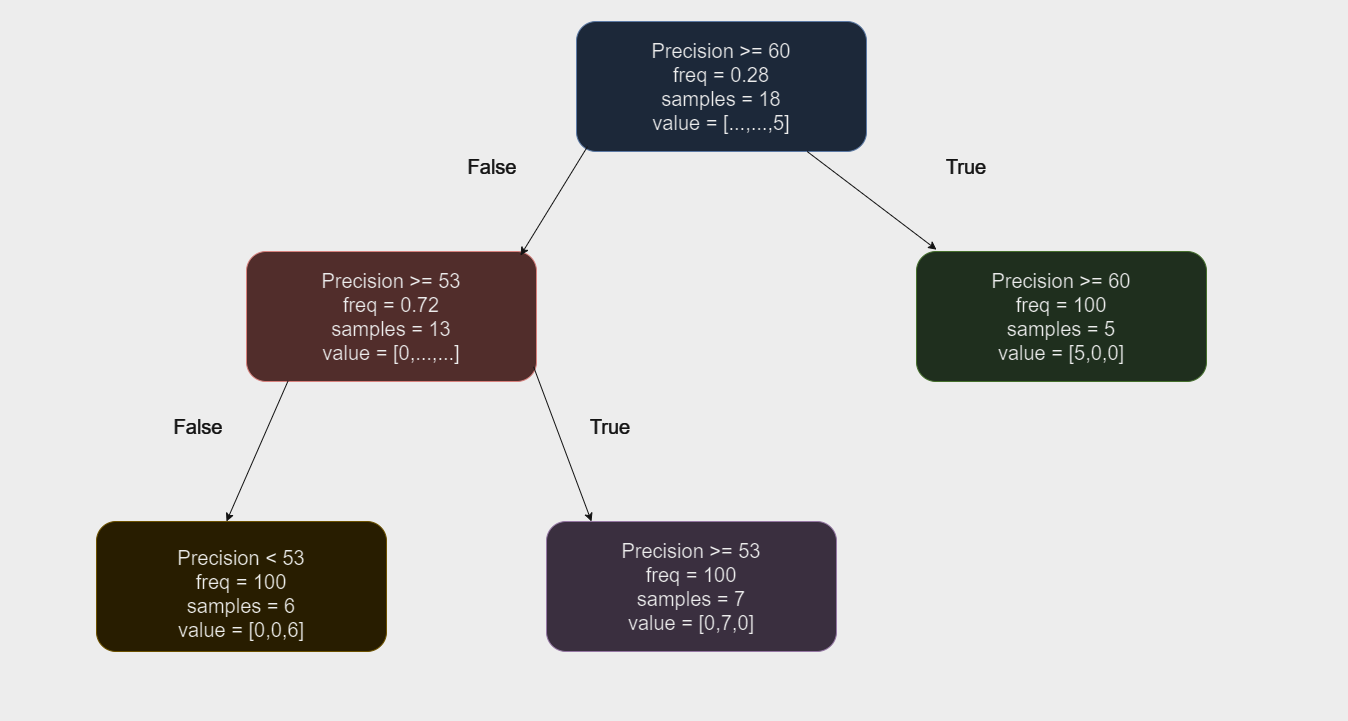

**Remarque** : Si l'arbre n'apparaît pas, nous avons déposé l'image sur Github.

On aperçoit dans notre tableau que le choix de la bibliothèque pour la génération des nombres aléatoires a peu d'influence sur les résultats. En tout cas, numpy et random sont assez similaires sur ce point. Il en est de même pour le nombre de répétitions, même avec un facteur 5 le pourcentage de bons résultats est quasiment le même. Comme nous pouvons observer sur l'arbre de décision ci-dessus, le facteur dominant de cette étude est la précision sur les flottants. En effet, plus la précision demandée par le développeur est grande plus l'associativité est vérifiée. On constate que pour une précision de 60, on a 100 % de réussite tandis que pour une précision de plus de 53 on est entre 75 et 80 % de bonnes réponses. Si on ne travaille pas en spécifiant la précision, on observe des résultats équivalents à une précision de 53. La précision de 50 réduit alors le pourcentage de réponses correctes habituel. On observe des résultats similaires pour la commutativité de la multiplication. Ils sont parfois plus bas car l'approximation est plus prononcée lors d'une multiplication.